In [1]:
# 导入需要的包
import pandas as pd
from matplotlib import pyplot as plt
import wordcloud

In [2]:
# 读取分词的文件
with open("all_data_cut.txt", "r") as f:
    content = f.readlines()

# 把文件中的所有评论内容拼接起来
gennerate_string = ""
for c in content:
    gennerate_string += c

gennerate_string[:25]

'喜欢 那个 打黑 拳 ！ ！还 可以 吧 。其实 '

/Users/nick/.venv/ML-training/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


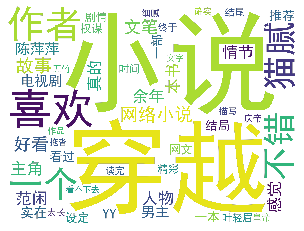

In [3]:
# 绘制词云
# 设置字体字体
myfont = "../../StaticFile/SimHei.ttf"
# myfont = "SimHei.ttf"
# 加载停用词，停用词就是在绘制词云中忽略的没有意义的词
stoplistdf = pd.read_csv('停用词.txt', names=["w"], sep="aaa", encoding="utf-8")
stoplist_wdc = list(stoplistdf.w)  # 停用词列表

# 词云 将所有的帖子拼接起来-统计词频-展示词云
# 生成词云对象
cloudobj = wordcloud.WordCloud(font_path = myfont, 
    width = 2000, height = 1500, max_words = 50,
    mode = "RGBA", background_color = None,
    stopwords = stoplist_wdc, collocations=False).generate(gennerate_string)  

# 展示图像
plt.imshow(cloudobj)
plt.axis("off")
plt.show()

In [4]:
# 统计训练集词频
stoplist_wdc = stoplist_wdc + [""]  # 停用词列表中加上空值
freq_list = []  # 所有词都存在这个列表中

# 将拼接好的所有评论处理为列表
word_list = gennerate_string.split(" ")
# 使用停用词过滤一遍
for g in word_list:
    g = g.strip()
    if g not in stoplist_wdc:  # 只将不在停用词表的词才放在freq_list中
        freq_list.append(g)

# 使用所有词生成一张表
word_df = pd.DataFrame(freq_list, columns=["word"])
word_df.head()

,word
0,喜欢
1,打黑
2,拳
3,！还
4,。其实


In [5]:
# 列出训练集top15的词，按照词频率排序
top15_word = word_df.groupby("word")["word"].count().sort_values(ascending=False)[:15]
top15_word

word
小说      395
…       332
穿越      330
喜欢      322
完       244
作者      240
一个      211
太       208
写       208
不错      206
猫腻      172
书       171
网络小说    164
故事      164
好看      153
Name: word, dtype: int64

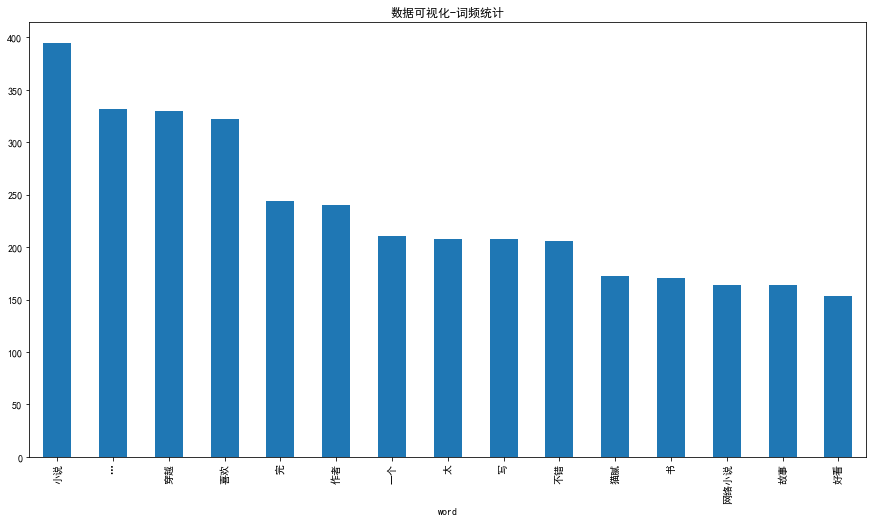

In [6]:
# 可视化词频
top15_word.plot.bar(title="数据可视化-词频统计", figsize=(15, 8))
plt.show()